<a href="https://colab.research.google.com/github/vinnimichelin/Series_Temporais_Dates/blob/main/Series_Temporais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import mean_absolute_error

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [2]:
!pip install scipy

In [3]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 7.8 MB/s eta 0:00:00


In [4]:
from pmdarima.arima import auto_arima

In [5]:
from xgboost import XGBRegressor

In [8]:
df = pd.read_excel('energy.xlsx', index_col='DATE', parse_dates=True)

df.head()

,energy
DATE,
1985-01-01,71.5920
1985-02-01,69.7870
1985-03-01,61.6790
1985-04-01,56.7479
1985-05-01,54.6165


In [10]:
df.describe()

,energy
count,408.000000
mean,88.062232
std,15.168540
min,54.616500
25%,76.499750
50%,88.940450
75%,99.733200
max,126.362600


In [11]:
df.index.min(), df.index.max()

(Timestamp('1985-01-01 00:00:00'), Timestamp('2018-12-01 00:00:00'))

In [12]:
df.columns = ['producao']

<Axes: xlabel='DATE'>

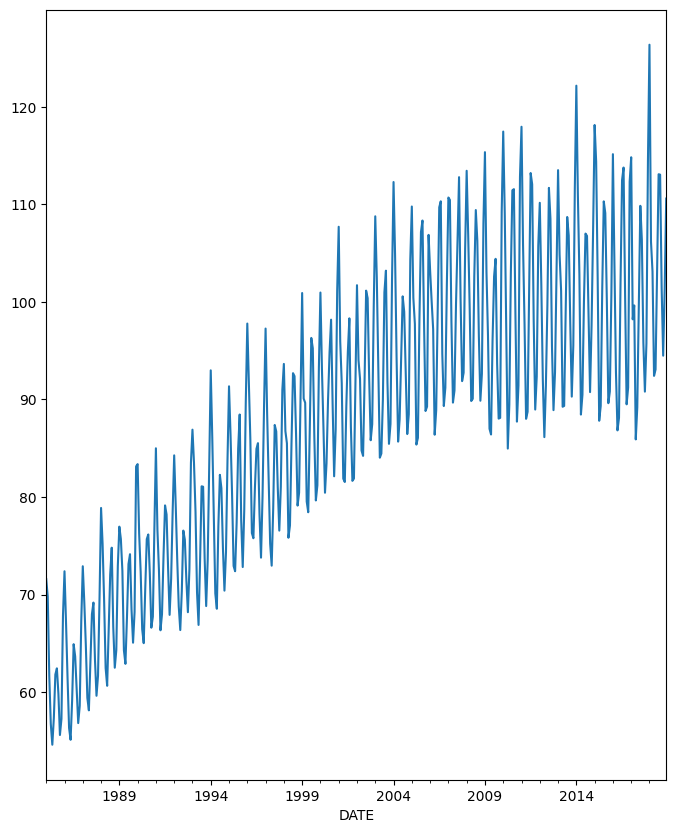

In [13]:
df['producao'].plot(figsize=(8,10))

<Figure size 800x600 with 0 Axes>

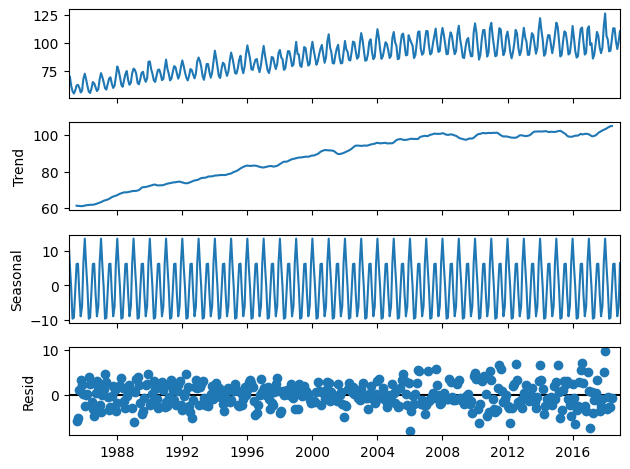

In [15]:
resultado = seasonal_decompose(df)

fig = plt.figure(figsize=(8,6))
fig = resultado.plot()

In [17]:
result = adfuller(df['producao'].dropna())

print(f'Teste ADR:{result[0]}')
print(f'P valor:{result[1]}')

Teste ADR:-2.252399047046594
P valor:0.18777984601967806


In [19]:
result = adfuller(df['producao'].diff().dropna())

print(f'Teste ADR:{result[0]}')
print(f'P valor:{result[1]}')

Teste ADR:-7.450892277526341
P valor:5.67456995585561e-11


In [25]:
fit_arima = auto_arima(df, D=1, start_P=1, start_Q=1, max_P=3, max_Q=3,
                       seasonal=True, m=6,
                       information_criterion='aic', trace=True, error_action='ignore', stepwise=True)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[6] intercept   : AIC=1962.896, Time=2.73 sec
 ARIMA(0,0,0)(0,1,0)[6] intercept   : AIC=2559.378, Time=0.08 sec
 ARIMA(1,0,0)(1,1,0)[6] intercept   : AIC=1974.835, Time=0.47 sec
 ARIMA(0,0,1)(0,1,1)[6] intercept   : AIC=2116.306, Time=0.36 sec
 ARIMA(0,0,0)(0,1,0)[6]             : AIC=2562.416, Time=0.06 sec
 ARIMA(2,0,2)(0,1,1)[6] intercept   : AIC=2075.786, Time=1.28 sec
 ARIMA(2,0,2)(1,1,0)[6] intercept   : AIC=1967.838, Time=1.21 sec
 ARIMA(2,0,2)(2,1,1)[6] intercept   : AIC=1934.544, Time=4.20 sec
 ARIMA(2,0,2)(2,1,0)[6] intercept   : AIC=1968.782, Time=2.70 sec
 ARIMA(2,0,2)(3,1,1)[6] intercept   : AIC=1925.297, Time=8.88 sec
 ARIMA(2,0,2)(3,1,0)[6] intercept   : AIC=1942.849, Time=3.05 sec
 ARIMA(2,0,2)(3,1,2)[6] intercept   : AIC=1879.245, Time=8.72 sec
 ARIMA(2,0,2)(2,1,2)[6] intercept   : AIC=1877.048, Time=4.67 sec
 ARIMA(2,0,2)(1,1,2)[6] intercept   : AIC=inf, Time=6.35 sec
 ARIMA(2,0,2)(2,1,3)[6] intercept   : 

In [27]:
model = SARIMAX(df, order=(1,1,1), seasonal_order=(1,1,2,6))

resultado_sarimax = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [29]:
print(resultado_sarimax.summary())

                                       SARIMAX Results                                        
Dep. Variable:                               producao   No. Observations:                  408
Model:             SARIMAX(1, 1, 1)x(1, 1, [1, 2], 6)   Log Likelihood                -927.200
Date:                                Mon, 29 Apr 2024   AIC                           1866.400
Time:                                        18:20:43   BIC                           1890.364
Sample:                                    01-01-1985   HQIC                          1875.889
                                         - 12-01-2018                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5125      0.042     12.156      0.000       0.430       0.595
ma.

In [31]:
predicoes = resultado_sarimax.get_prediction(start=-12)

pred_media = predicoes.predicted_mean

In [33]:
intervalo_confianca = predicoes.conf_int()

limite_abaixo = intervalo_confianca.iloc[:,0]
limite_acima = intervalo_confianca.iloc[:,1]

limite_abaixo[0], limite_acima[0]

(115.1447404570401, 124.45517675290846)

In [35]:
pred_media[0]

119.79995860497428

In [37]:
datas_previsao = np.array(pred_media.index)

datas = np.asarray(df.index)

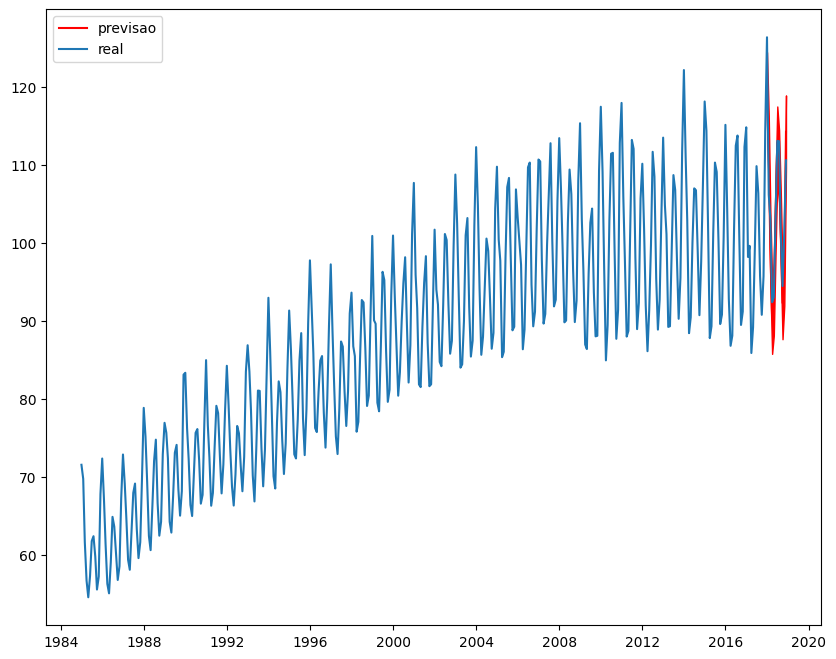

In [40]:
plt.figure(figsize=(10,8))
plt.plot(datas_previsao, pred_media.values, color='red', label='previsao')
plt.fill_between(datas_previsao, limite_abaixo, limite_acima, color='red')
plt.plot(datas, df.values, label='real')
plt.legend()
plt.show()


In [42]:
mae = mean_absolute_error(df[-12:].values, pred_media.values)

print(mae)

2.7071201498891306


In [44]:
forecast = resultado_sarimax.get_forecast(steps=12)
forecast_medio = forecast.predicted_mean

forecast_medio.size

12

In [46]:
ic_forecast = forecast.conf_int()

ic_abaixo = ic_forecast.iloc[:,0]
ic_acima = ic_forecast.iloc[:,1]

ic_abaixo[0], ic_acima[0]

(115.34916323581818, 124.659585363667)

In [47]:
datas_forecast = np.array(forecast_medio.index)

pred_dates = np.asarray(pred_media.index)

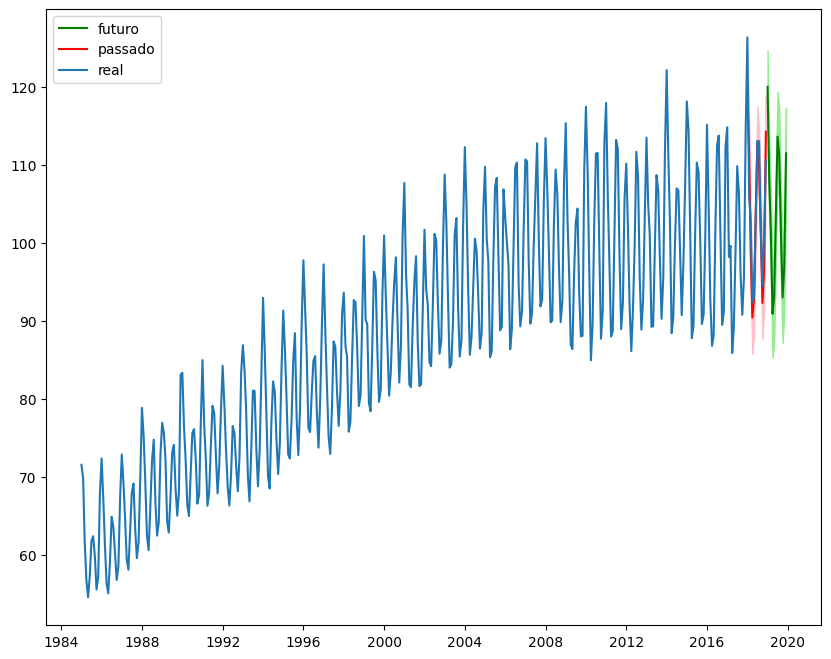

In [50]:
dates = np.asarray(df.index)

plt.figure(figsize=(10,8))
plt.plot(datas_forecast, forecast_medio.values, color='green', label='futuro')
plt.fill_between(datas_forecast, ic_abaixo, ic_acima, color='lightgreen')

plt.plot(datas_previsao, pred_media.values, color='red', label='passado')
plt.fill_between(datas_previsao, limite_abaixo, limite_acima, color='pink')

plt.plot(datas, df.values, label='real')
plt.legend()
plt.show()